In [1]:
import pandas as pd
clickstream_train=pd.read_csv('train_data.csv')
clickstream_test=pd.read_csv('test_data.csv')

In [3]:
clickstream_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


In [4]:
asia=[1,20,40,6]
clickstream_test['country']=['Asia' if i in asia else i for i in clickstream_test['country']]

In [5]:
europe=[2,3,7,8,9,10,11,13,14,15,16,17,18,19,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,41]
clickstream_test['country']=['Europe' if i in europe else i for i in clickstream_test['country']]

In [6]:
america=[4,5,42,26]
clickstream_test['country']=['Americas' if i in america else i for i in clickstream_test['country']]

In [7]:
business=[43,44,45,46,47]
clickstream_test['country']=['Business' if i in business else i for i in clickstream_test['country']]

In [8]:
darknet=[12]
clickstream_test['country']=['Darknet' if i in darknet else i for i in clickstream_test['country']]

In [10]:
clickstream_test['country'].unique()

array(['Europe', 'Business', 'Asia', 'Darknet', 'Americas'], dtype=object)

In [12]:
session=clickstream_train.groupby(['session_id','country'])['country'].count().reset_index(name='count')

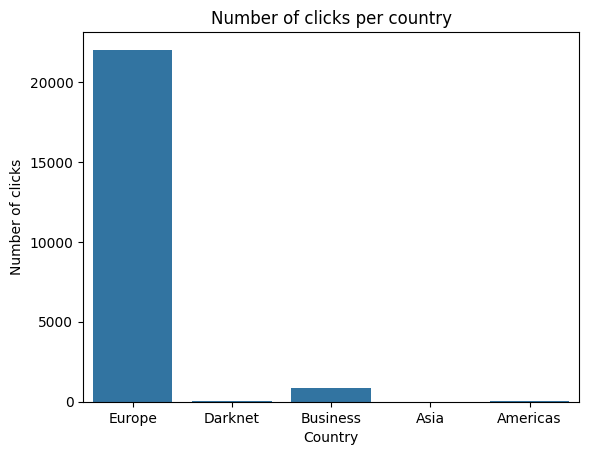

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Number of clicks per country')
sns.countplot(data=session,x='country')
plt.xlabel('Country')
plt.ylabel('Number of clicks')
plt.show()

In [14]:
session=clickstream_train.groupby(['country','price_2'])['price_2'].count().reset_index(name='purchase_count')

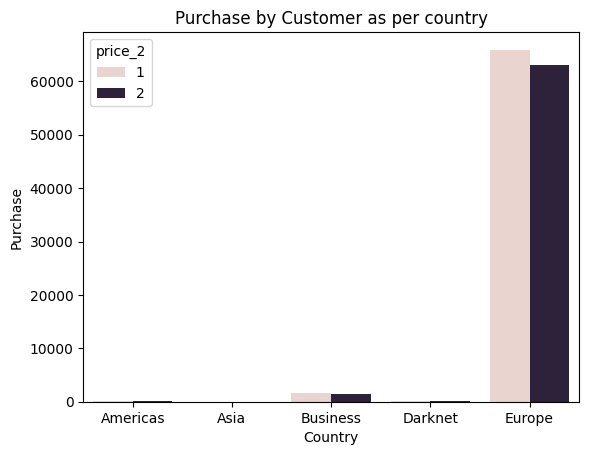

In [15]:
plt.title('Purchase by Customer as per country')
sns.barplot(data=session,x='country',y='purchase_count',hue='price_2')
plt.xlabel('Country')
plt.ylabel('Purchase')
plt.show()

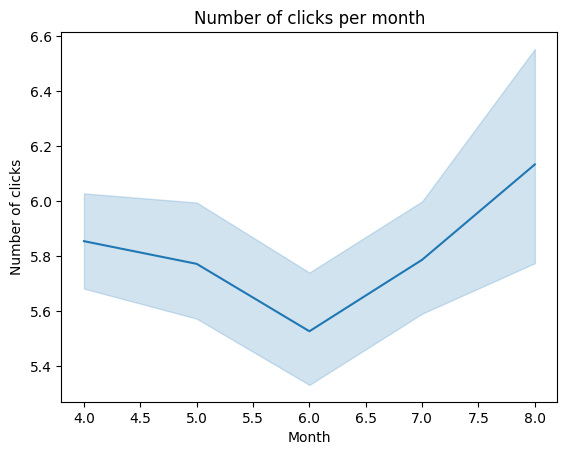

In [16]:
session=clickstream_train.groupby(['session_id','month'])['session_id'].count().reset_index(name='count')
plt.title('Number of clicks per month')
sns.lineplot(data=session,x='month',y='count')
plt.xlabel('Month')
plt.ylabel('Number of clicks')
plt.show()

In [17]:
session=clickstream_train.groupby(['session_id','page'])['session_id'].count().reset_index(name='count')

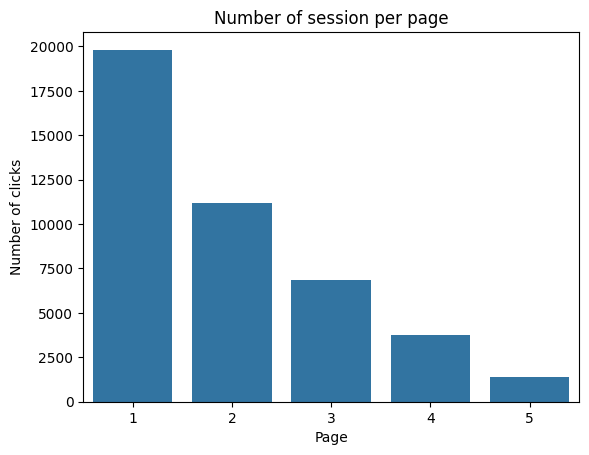

In [18]:
plt.title('Number of session per page')
sns.countplot(data=session,x='page',)
plt.xlabel('Page')
plt.ylabel('Number of clicks')
plt.show()

In [19]:
photolocation=clickstream_train.groupby(['location','price_2'])['price_2'].count().reset_index(name='purchase_count')

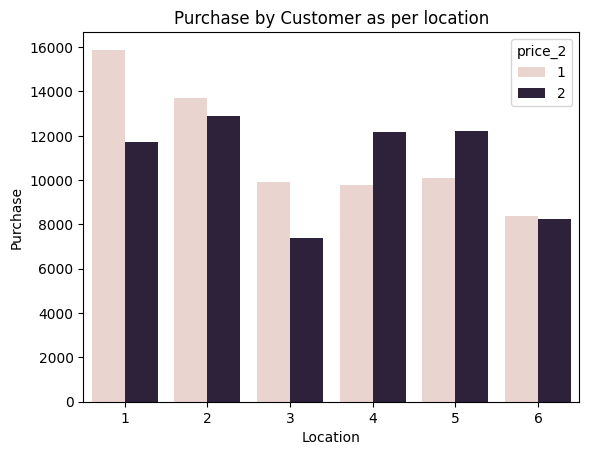

In [20]:
plt.title('Purchase by Customer as per location')
sns.barplot(data=photolocation,x='location',y='purchase_count',hue='price_2')
plt.xlabel('Location')
plt.ylabel('Purchase')
plt.show()

In [21]:
photolocation=clickstream_train.groupby(['day','price_2'])['price_2'].count().reset_index(name='purchase_count')

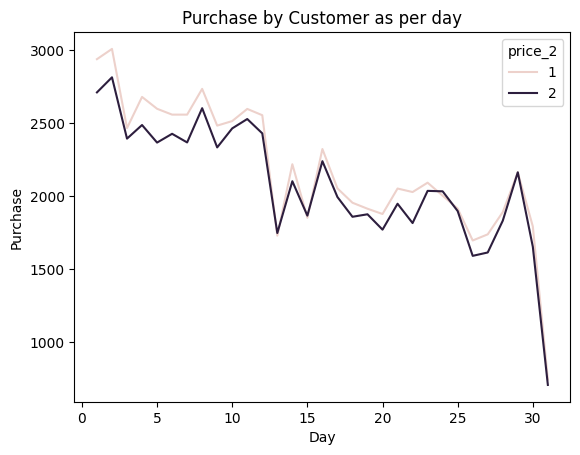

In [22]:
plt.title('Purchase by Customer as per day')
sns.lineplot(data=photolocation,x='day',y='purchase_count',hue='price_2')
plt.xlabel('Day')
plt.ylabel('Purchase')
plt.show()

In [24]:
clickstream_train['country'].value_counts()

country
Europe      128900
Business      3152
Darknet        166
Americas       147
Asia            14
Name: count, dtype: int64

In [38]:
clickstream_train['price_2'].value_counts()

price_2
1    67714
2    64665
Name: count, dtype: int64

In [39]:
clickstream_test['clicks']=clickstream_train['session_id'].map(clickstream_train['session_id'].value_counts())

In [40]:
clickstream_train

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,clicks
65217,2008,4,1,2,Europe,1,1,A16,1,6,1,33,2,1,8
94740,2008,4,1,3,Europe,1,2,B4,10,2,1,52,1,1,8
37541,2008,4,1,4,Europe,1,2,B17,6,6,2,38,2,1,8
1304,2008,4,1,5,Europe,1,2,B8,4,3,2,52,1,1,8
119700,2008,4,1,6,Europe,1,3,C56,6,1,2,57,1,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109417,2008,8,13,1,Europe,24024,2,B10,2,4,1,67,1,1,1
51669,2008,8,13,1,Europe,24025,1,A11,3,4,1,62,1,1,1
89568,2008,8,13,1,Europe,24026,1,A2,3,1,1,43,2,1,3
66753,2008,8,13,2,Europe,24026,3,C2,12,1,1,43,1,1,3


In [41]:
clickstream_train=clickstream_train.sort_values(by=['session_id','order'],ascending=True)

In [11]:
clickstream_test.to_csv('clickstream_test_prediction.csv',index=False)

In [43]:
session_click=clickstream_train.groupby('session_id').size()
bounced_session=session_click[session_click==1].sum()
total_session=session_click.count()
bounced_rate=(bounced_session/total_session)*100
print(bounced_rate)

23.71890004364906


In [44]:
session_exit=clickstream_train.groupby('session_id')['page'].last()
session_exit_count=session_exit.value_counts()
total_page=clickstream_train['page'].value_counts()
exit_rate=(session_exit_count/total_page)*100
print(exit_rate)

page
1    17.173788
2    15.877988
3    17.104072
4    21.518987
5    30.482456
Name: count, dtype: float64


In [45]:
session_counts = clickstream_train['session_id'].value_counts()

total_users = session_counts.count()
returning_users = (session_counts > 1).sum()

revisit_rate = (returning_users / total_users) * 100

print(f"Total Users: {total_users}")
print(f"Returning Users: {returning_users}")
print(f"Revisit Rate: {revisit_rate:.2f}%")


Total Users: 22910
Returning Users: 17476
Revisit Rate: 76.28%


In [1]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
class DataEncoding:
  def __init__(self,data):
    self.data=data 
  def label_encoder(self,columns):
    label_encoder=LabelEncoder()
    for i in columns:
      self.data[i]=label_encoder.fit_transform(self.data[i])
    return self.data
  def one_hot_encoder(self,columns):
    one_hot_encoder=OneHotEncoder(sparse_output=False)
    encoded_data=one_hot_encoder.fit_transform(self.data[columns])
    encoded_columns=one_hot_encoder.get_feature_names_out(columns)
    encoded_df=pd.DataFrame(encoded_data,columns=encoded_columns)
    self.data=pd.concat([self.data.drop(columns,axis=1),encoded_df],axis=1)
    return self.data

In [33]:
de=DataEncoding(clickstream_train)
clickstream_train=de.one_hot_encoder(['country'])

In [34]:
clickstream_train=de.label_encoder(columns=['page2_clothing_model'])

In [35]:
clickstream_train

,year,month,day,order,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,clicks,country_Americas,country_Asia,country_Business,country_Darknet,country_Europe
65217,2008,4,1,2,1,1,7,1,6,1,33,2,1,8,0.0,0.0,0.0,0.0,1.0
94740,2008,4,1,3,1,2,70,10,2,1,52,1,1,8,0.0,0.0,0.0,0.0,1.0
37541,2008,4,1,4,1,2,51,6,6,2,38,2,1,8,0.0,0.0,0.0,0.0,1.0
1304,2008,4,1,5,1,2,74,4,3,2,52,1,1,8,0.0,0.0,0.0,0.0,1.0
119700,2008,4,1,6,1,3,127,6,1,2,57,1,4,8,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109417,2008,8,13,1,24024,2,44,2,4,1,67,1,1,1,0.0,0.0,0.0,0.0,1.0
51669,2008,8,13,1,24025,1,2,3,4,1,62,1,1,1,0.0,0.0,0.0,0.0,1.0
89568,2008,8,13,1,24026,1,11,3,1,1,43,2,1,3,0.0,0.0,0.0,0.0,1.0
66753,2008,8,13,2,24026,3,87,12,1,1,43,1,1,3,0.0,0.0,0.0,0.0,1.0


In [36]:
clickstream_train=clickstream_train.sort_values(by=['session_id','order'],ascending=True)

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import pickle as pkl
class regression:
  def __init__(self,data):
    self.data=None
  def linear_regression(self,x_train,x_test,y_train,y_test,):
    model=LinearRegression()
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    print('R2 score= ',r2_score(y_test,prediction))
    print('MAE= ',mean_absolute_error(y_test,prediction))

  def lasso_regression(self,x_train,x_test,y_train,y_test):
    model=Lasso(alpha=1.0)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    print('R2 score= ',r2_score(y_test,prediction))
    print('MAE= ',mean_absolute_error(y_test,prediction))

  def ridge_regression(self,x_train,x_test,y_train,y_test):
    model=Ridge(alpha=1.0)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    print('R2 score= ',r2_score(y_test,prediction))
    print('MAE= ',mean_absolute_error(y_test,prediction))

  def gradientboostingregressor(self,x_train,x_test,y_train,y_test):
    parameters=dict(n_estimators=1000,max_depth=5,learning_rate=0.1,random_state=42)
    gbr_full=GradientBoostingRegressor(**parameters)
    gbr_early_stopping=GradientBoostingRegressor(**parameters,validation_fraction=0.1,n_iter_no_change=10)

    gbr_full.fit(x_train,y_train)
    n_estimators_full = gbr_full.n_estimators_

    gbr_early_stopping.fit(x_train, y_train)
    estimators_early_stopping = gbr_early_stopping.n_estimators_
    optimal_n_estimators = gbr_early_stopping.n_estimators_
    final_model = GradientBoostingRegressor(
        n_estimators=optimal_n_estimators,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,)
    Xfulltrain=x_train
    yfulltrain=y_train
    final_model.fit(Xfulltrain,yfulltrain)

    y_pred_gbr=final_model.predict(x_test)
    mae4=mean_absolute_error(y_test,y_pred_gbr)
    r24=r2_score(y_test,y_pred_gbr)
    print(f"MAE:{mae4}")
    print(f"R2:{r24}")


  def xgboost(self,x_train,x_test,y_train,y_test): # Added userinput=None as a default parameter
    model=XGBRegressor(objective="reg:squarederror",n_estimators=2000,seed=123,max_depth=5,learning_rate=0.1,random_state=42)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    print('R2 score= ',r2_score(y_test,prediction))
    print('MAE= ',mean_absolute_error(y_test,prediction))
    with open('xgboost.pkl','wb') as f:
      pkl.dump(model,f)

In [71]:
x=clickstream_train[['page1_main_category','page2_clothing_model','colour']]
y=clickstream_train['price']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [72]:
reg=regression(clickstream_train)

In [41]:
reg.gradientboostingregressor(X_train,X_test,y_train,y_test)

MAE:0.01631305959402142
R2:0.999996331248519


In [43]:
reg.linear_regression(X_train,X_test,y_train,y_test)

R2 score=  0.13525758199277382
MAE=  10.046197065125604


In [44]:
reg.lasso_regression(X_train,X_test,y_train,y_test)

R2 score=  0.1272052824153188
MAE=  9.995809025918586


In [45]:
reg.ridge_regression(X_train,X_test,y_train,y_test)

R2 score=  0.1352574426325247
MAE=  10.04617797449774


In [73]:
reg.xgboost(X_train,X_test,y_train,y_test)

R2 score=  1.0
MAE=  0.0001283938909182325


In [74]:
# prompt: write a code to check the model with a user input

import pickle as pkl
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the trained XGBoost model
with open('xgboost.pkl', 'rb') as f:
    model = pkl.load(f)

# User input for features
page1_main_category = int(input("Enter page1_main_category: "))
page2_clothing_model = int(input("Enter page2_clothing_model: "))
colour = int(input("Enter colour: "))

# Create a NumPy array from user input
user_input = np.array([[page1_main_category, page2_clothing_model, colour]])

# Load the StandardScaler used during training (assuming it's saved as 'scaler.pkl')
with open('scaler.pkl', 'rb') as f:
    scaler = pkl.load(f)

# Scale the user input using the loaded scaler
user_input_scaled = scaler.transform(user_input)

# Make a prediction using the loaded model
prediction = model.predict(user_input_scaled)

# Print the prediction
print("Predicted price:", prediction[0])


Enter page1_main_category: 1
Enter page2_clothing_model: 3
Enter colour: 5


FileNotFoundError: [Errno 2] No such file or directory: 'scaler.pkl'

In [75]:
import pickle as pkl
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the trained XGBoost model
with open('xgboost.pkl', 'rb') as f:
    model = pkl.load(f)

# User input for features
page1_main_category = int(input("Enter page1_main_category: "))
page2_clothing_model = int(input("Enter page2_clothing_model: "))
colour = int(input("Enter colour: "))

# Create a NumPy array from user input
user_input = np.array([[page1_main_category, page2_clothing_model, colour]])

# Instead of loading the scaler from a file, since it wasn't saved,
# you can create a new instance of StandardScaler and use the previously
# fitted scaler (stored in the 'scaler' global variable) to transform the data.
# Alternatively, you should have saved the scaler in your previous code using:
# with open('scaler.pkl', 'wb') as f:
#     pkl.dump(scaler, f)
#
# Assuming 'scaler' is already fitted in your environment:
user_input_scaled = scaler.transform(user_input)

# Make a prediction using the loaded model
prediction = model.predict(user_input_scaled)

# Print the prediction
print("Predicted price:", prediction[0])

Enter page1_main_category: 3
Enter page2_clothing_model: 5
Enter colour: 5
Predicted price: 38.474407


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
class classification:
  def __init__(self,data):
    self.data=data

  def logistic_regression(self,x_train,x_test,y_train,y_test):
    from sklearn.linear_model import LogisticRegression
    model=LogisticRegression()
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    print('Accuracy= ',accuracy_score(y_test,prediction))
    print('Confusion Matrix= \n',confusion_matrix(y_test,prediction))
    print('Classification Report= \n',classification_report(y_test,prediction))

  def decision_tree(self,x_train,x_test,y_train,y_test):
    from sklearn.tree import DecisionTreeClassifier
    model=DecisionTreeClassifier()
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    print('Accuracy= ',accuracy_score(y_test,prediction))
    print('Confusion Matrix= \n',confusion_matrix(y_test,prediction))
    print('Classification Report= \n',classification_report(y_test,prediction))

  def random_forest(self,x_train,x_test,y_train,y_test):
    from sklearn.ensemble import RandomForestClassifier
    model=RandomForestClassifier()
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    print('Accuracy= ',accuracy_score(y_test,prediction))
    print('Confusion Matrix= \n',confusion_matrix(y_test,prediction))
    print('Classification Report= \n',classification_report(y_test,prediction))

  def xgboost(self,x_train,x_test,y_train,y_test):
    from xgboost import XGBClassifier
    model=XGBClassifier()
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    print('Accuracy= ',accuracy_score(y_test,prediction))
    print('Confusion Matrix= \n',confusion_matrix(y_test,prediction))
    print('Classification Report= \n',classification_report(y_test,prediction))


In [78]:
cls=classification(clickstream_train)

In [79]:
from sklearn.preprocessing import LabelEncoder
x=clickstream_train[['page1_main_category',	'page2_clothing_model',	'colour',	'location',	'model_photography', 'page', 'price']]
y=clickstream_train['price_2']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [80]:
cls.decision_tree(X_train,X_test,y_train,y_test)

Accuracy=  1.0
Confusion Matrix= 
 [[13524     0]
 [    0 12952]]
Classification Report= 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13524
           1       1.00      1.00      1.00     12952

    accuracy                           1.00     26476
   macro avg       1.00      1.00      1.00     26476
weighted avg       1.00      1.00      1.00     26476



In [81]:
cls.logistic_regression(X_train,X_test,y_train,y_test)

Accuracy=  0.9979981870373168
Confusion Matrix= 
 [[13471    53]
 [    0 12952]]
Classification Report= 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13524
           1       1.00      1.00      1.00     12952

    accuracy                           1.00     26476
   macro avg       1.00      1.00      1.00     26476
weighted avg       1.00      1.00      1.00     26476



In [52]:
cls.random_forest(X_train,X_test,y_train,y_test)

Accuracy=  1.0
Confusion Matrix= 
 [[13524     0]
 [    0 12952]]
Classification Report= 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13524
           1       1.00      1.00      1.00     12952

    accuracy                           1.00     26476
   macro avg       1.00      1.00      1.00     26476
weighted avg       1.00      1.00      1.00     26476



In [53]:
cls.xgboost(X_train,X_test,y_train,y_test)

Accuracy=  1.0
Confusion Matrix= 
 [[13524     0]
 [    0 12952]]
Classification Report= 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13524
           1       1.00      1.00      1.00     12952

    accuracy                           1.00     26476
   macro avg       1.00      1.00      1.00     26476
weighted avg       1.00      1.00      1.00     26476

